In [5]:
import pandas as pd
# pd.set_option()


pd.set_option('display.max_columns',50)

train = pd.read_csv('./Data/Yes_Bank_Train.csv')

print(train.shape,'\n')
print(train.info(),'\n')
print(train.describe().T,'\n')
print(train.head(20),'\n')
print(train.tail(20),'\n')

(17773, 56) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17773 entries, 0 to 17772
Data columns (total 56 columns):
Serial Number                     17773 non-null int64
fund_symbol                       17773 non-null object
fund_name                         17773 non-null object
category                          17773 non-null object
fund_family                       17773 non-null object
investment                        16783 non-null object
size                              16783 non-null object
total_net_assets                  17773 non-null int64
currency                          17773 non-null object
net_annual_expenses_ratio         17761 non-null float64
morningstar_rating                17773 non-null int64
inception_date                    17773 non-null object
portfolio_cash                    17768 non-null float64
portfolio_stocks                  17768 non-null float64
portfolio_bonds                   17768 non-null float64
portfolio_others                  17

In [244]:
train.isnull().sum()

Serial Number                        0
fund_symbol                          0
fund_name                            0
category                             0
fund_family                          0
investment                           0
size                                 0
total_net_assets                     0
currency                             0
net_annual_expenses_ratio            0
morningstar_rating                   0
inception_date                       0
portfolio_cash                       0
portfolio_stocks                     0
portfolio_bonds                      0
portfolio_others                     0
portfolio_preferred                  0
portfolio_convertable                0
sectors_basic_materials              0
sectors_consumer_cyclical            0
sectors_financial_services           0
sectors_real_estate                  0
sectors_consumer_defensive           0
sectors_healthcare                   0
sectors_utilities                    0
sectors_communication_ser

In [33]:
# rm_train = train[train['alpha_3y'].notnull()]

In [6]:
train = train[train['returns_ytd'].notnull()]

In [7]:
train = train[train['portfolio_bonds'].notnull()]


In [8]:
train['bonds_aaa'].isnull().sum()

0

In [9]:
train['bonds_aaa'].describe()

count    17654.000000
mean        12.512602
std         23.696518
min         -7.600000
25%          0.000000
50%          0.000000
75%         13.310000
max        104.170000
Name: bonds_aaa, dtype: float64

In [10]:
train['bonds_aa'].describe()

count    17654.000000
mean         4.548923
std         12.366100
min        -11.460000
25%          0.000000
50%          0.000000
75%          2.585000
max        177.170000
Name: bonds_aa, dtype: float64

In [11]:
train['net_annual_expenses_ratio'].describe()

count    17642.000000
mean         1.028833
std          0.623832
min          0.000000
25%          0.630000
50%          0.970000
75%          1.370000
max         19.100000
Name: net_annual_expenses_ratio, dtype: float64

In [12]:
train['bonds_aaa'].isnull().sum()

0

In [178]:
# sns.set()
# cols = ['returns_2017','returns_2016']#,'returns_2015','returns_2014','returns_2013','returns_2012','returns_2011','returns_2010']
# sns.pairplot(train[cols])#,size=2.5)
# plt.show()

In [148]:
train['bonds_aa'].mean()

4.548923190211843

In [37]:
8980/17642

0.5090125836073007

In [38]:
# rm_train.isnull().sum()

### Data exploration and missing value treatment

In [13]:
import seaborn as sns
import numpy as np

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


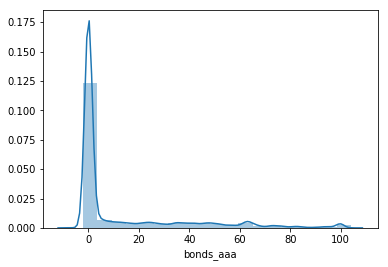

In [14]:
sns.distplot(train['bonds_aaa'],bins=20, norm_hist=True)

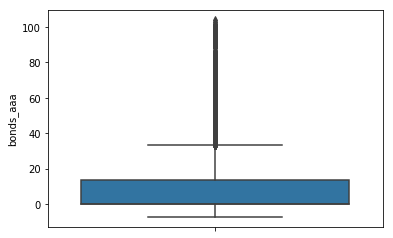

In [15]:
sns.boxplot(y=train['bonds_aaa'])

In [112]:
# train[train['bonds_aaa']>20].count()
# skewnes and kurtosis
print("skewnes  : %f" % train['bonds_aaa'].skew())
print("Kurtosis : %f"% train['bonds_aaa'].kurt())

skewnes  : 1.982420
Kurtosis : 3.074922


#### Relationsip with other variables

In [119]:
import matplotlib.pyplot as plt


In [23]:
train['investment'] = train['investment'].replace(np.nan, 'MISSING')

In [24]:
print(train['investment'].unique())
print(train['size'].unique())

['Blend' 'Value' 'Growth' 'MISSING']
['Large' 'Medium' nan 'Small']


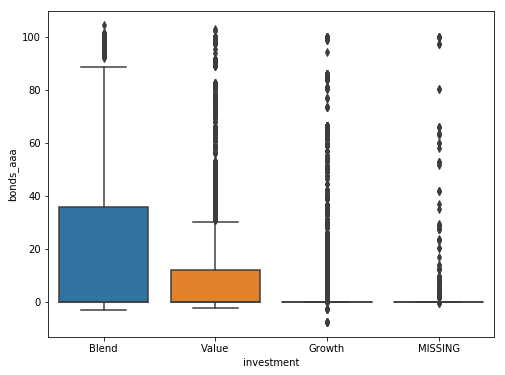

In [136]:
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='investment', y='bonds_aaa', data=train)
# fig.axis(ymin=0, ymar=100)

In [27]:
train['size'] = train['size'].replace(np.nan, 'MISSING_size')

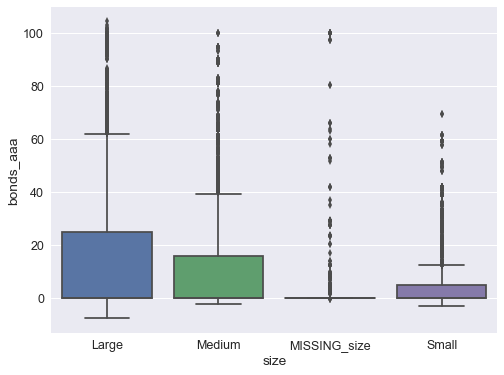

In [241]:
f,ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x='size', y='bonds_aaa', data=train)
# fig.axis(ymin=0, ymar=100)

In [ ]:
train['net_exp']

Text(0.5,0,'Bonds_aa')

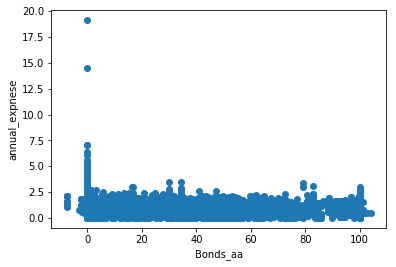

In [159]:
# net_expense_ratio -- bonds_aa
plt.scatter(y='net_annual_expenses_ratio', x='bonds_aaa',data=train)
plt.ylabel('annual_expnese')
plt.xlabel('Bonds_aa')

In [20]:
from sklearn.preprocessing import Imputer
imputer = Imputer()
# train['net_annual_expenses_ratio'] =imputer.fit_transform(train[['net_annual_expenses_ratio']]).ravel()

Text(0.5,0,'Bonds_aa')

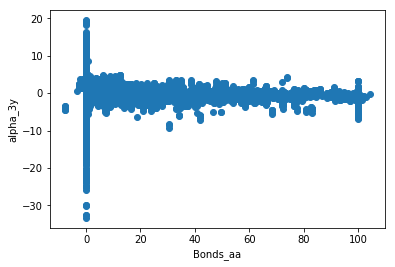

In [161]:
# net_expense_ratio -- bonds_aa
plt.scatter(y='alpha_3y', x='bonds_aaa',data=train)
plt.ylabel('alpha_3y')
plt.xlabel('Bonds_aa')

Text(0.5,0,'Bonds_aa')

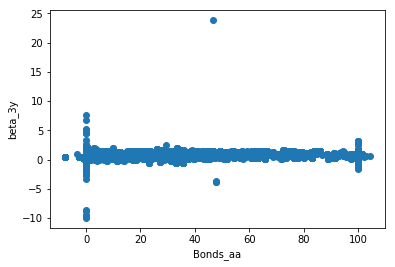

In [163]:
# net_expense_ratio -- bonds_aa
plt.scatter(y='beta_3y', x='bonds_aaa',data=train)
plt.ylabel('beta_3y')
plt.xlabel('Bonds_aa')

In [199]:
train.columns

Index(['Serial Number', 'fund_symbol', 'fund_name', 'category', 'fund_family',
       'investment', 'size', 'total_net_assets', 'currency',
       'net_annual_expenses_ratio', 'morningstar_rating', 'inception_date',
       'portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning',
       'bonds_us_government', 'bonds_aaa', 'bonds_aa', 'bonds_a', 'bonds_bbb',
       'bonds_bb', 'bonds_b', 'bonds_below_b', 'bonds_others',
       'morningstar_return_rating', 'returns_ytd', 'returns_2017',
       'returns_2016', 'returns_2015', 'returns_2014', 'returns_2013',
       'returns_2012', 'returns_20

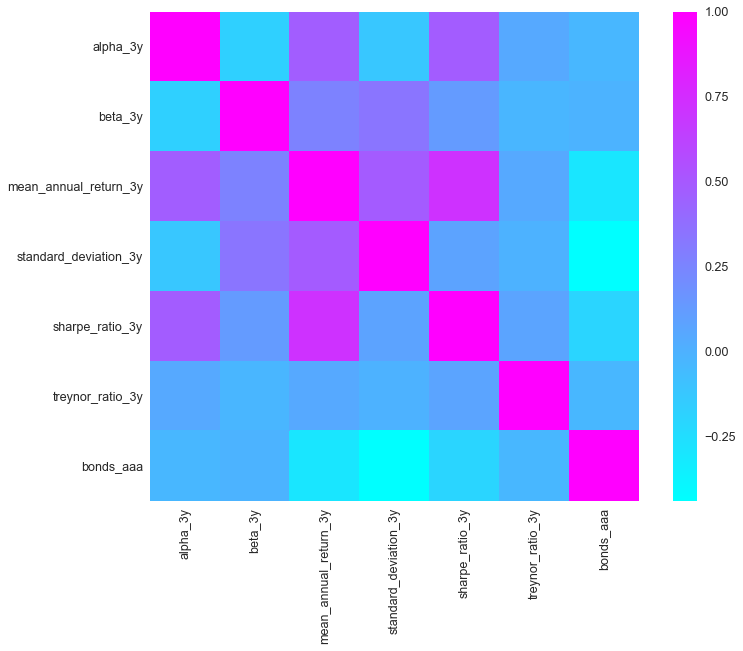

In [203]:
corrmat = train[['alpha_3y','beta_3y','mean_annual_return_3y','standard_deviation_3y','sharpe_ratio_3y','treynor_ratio_3y', 'bonds_aaa']].corr()
f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(corrmat,vmax=1, square=True, cmap='cool')

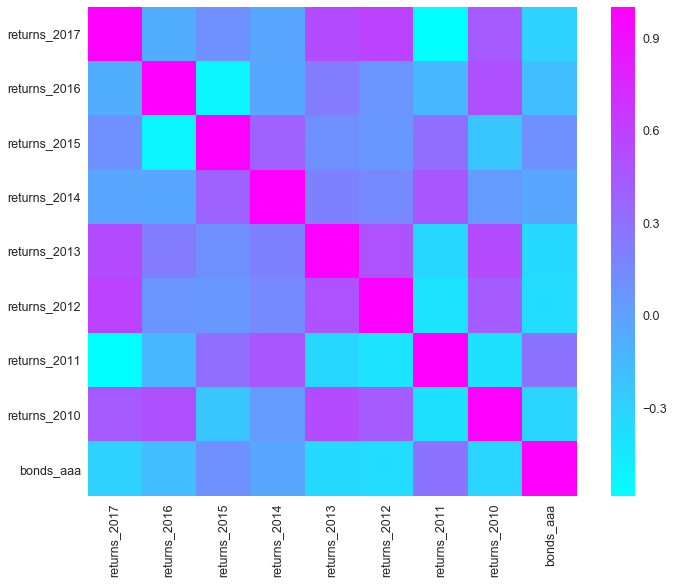

In [213]:
corrmat = train[['returns_2017','returns_2016','returns_2015','returns_2014','returns_2013','returns_2012','returns_2011','returns_2010','bonds_aaa']].corr()
f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(corrmat,vmax=1, square=True, cmap='cool')

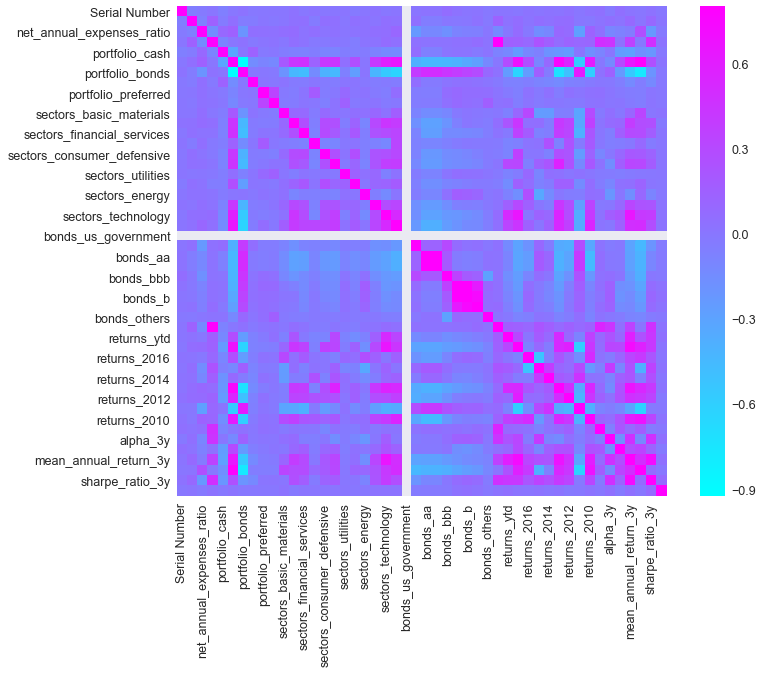

In [169]:
corrmat = train.corr()
f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(corrmat,vmax=0.8, square=True, cmap='cool')

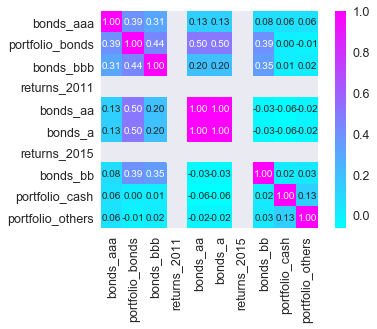

In [168]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'bonds_aaa')['bonds_aaa'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f",
                annot_kws={'size':10}, yticklabels= cols.values,
                xticklabels = cols.values, cmap='cool')
plt.show()

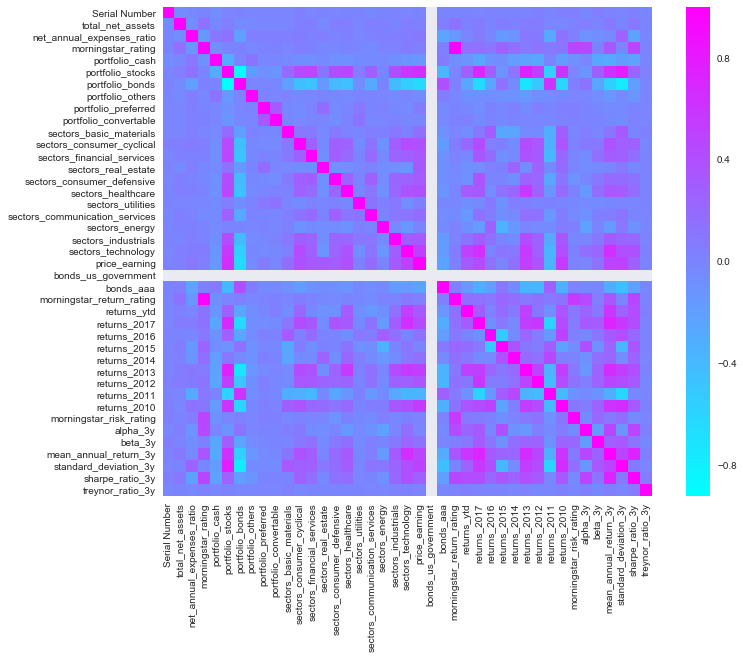

In [200]:
train_without_bonds = train[['Serial Number', 'fund_symbol', 'fund_name', 'category', 'fund_family',
       'investment', 'size', 'total_net_assets', 'currency',
       'net_annual_expenses_ratio', 'morningstar_rating', 'inception_date',
       'portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning',
       'bonds_us_government', 'bonds_aaa',
       'morningstar_return_rating', 'returns_ytd', 'returns_2017',
       'returns_2016', 'returns_2015', 'returns_2014', 'returns_2013',
       'returns_2012', 'returns_2011', 'returns_2010',
       'morningstar_risk_rating', 'alpha_3y', 'beta_3y',
       'mean_annual_return_3y', 'standard_deviation_3y', 'sharpe_ratio_3y',
       'treynor_ratio_3y']]

corrmat_without_bonds = train_without_bonds.corr()
f, ax = plt.subplots(figsize= (12,9))
sns.heatmap(corrmat_without_bonds,vmax=1, square=True, cmap='cool')

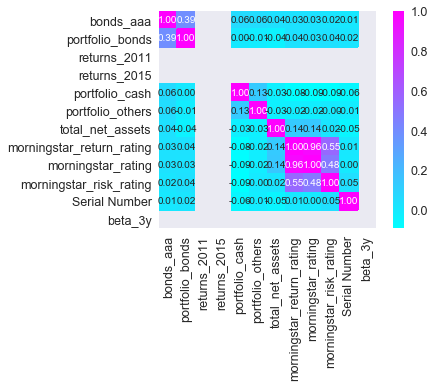

In [202]:
k = 12 #number of variables for heatmap
cols = corrmat_without_bonds.nlargest(k, 'bonds_aaa')['bonds_aaa'].index
cm = np.corrcoef(train_without_bonds[cols].values.T)
sns.set(font_scale=1.25)

hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f",
                annot_kws={'size':10}, yticklabels= cols.values,
                xticklabels = cols.values, cmap='cool')
plt.show()

In [179]:
train[['returns_2017','returns_2016','returns_2015','returns_2014','returns_2013','returns_2012','returns_2011','returns_2010']].corr()


,returns_2017,returns_2016,returns_2015,returns_2014,returns_2013,returns_2012,returns_2011,returns_2010
returns_2017,1.000000,-0.079648,0.096595,-0.034016,0.526800,0.590800,-0.586803,0.436361
returns_2016,-0.079648,1.000000,-0.521702,-0.039480,0.227738,0.073426,-0.143302,0.503958
returns_2015,0.096595,-0.521702,1.000000,0.390450,0.112360,0.063557,0.307602,-0.228007
returns_2014,-0.034016,-0.039480,0.390450,1.000000,0.198777,0.146456,0.458146,0.038103
returns_2013,0.526800,0.227738,0.112360,0.198777,1.000000,0.496652,-0.337521,0.531306
returns_2012,0.590800,0.073426,0.063557,0.146456,0.496652,1.000000,-0.409156,0.435434
returns_2011,-0.586803,-0.143302,0.307602,0.458146,-0.337521,-0.409156,1.000000,-0.396241
returns_2010,0.436361,0.503958,-0.228007,0.038103,0.531306,0.435434,-0.396241,1.000000


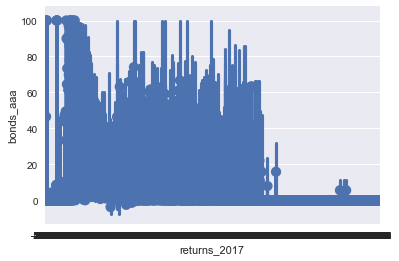

In [193]:
# plt.plot(x= train['returns_2017'], y= train['bonds_aaa'])#,data=train)
sns.set()
sns.pointplot(x='returns_2017',y='bonds_aaa',data=train)
# sns.lmplot?

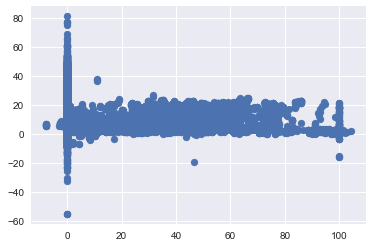

In [197]:
# sns.scatterplot(x='returns_2017',y='bonds_aaa',data=train)
plt.scatter(y='returns_2017',x='bonds_aaa',data=train)

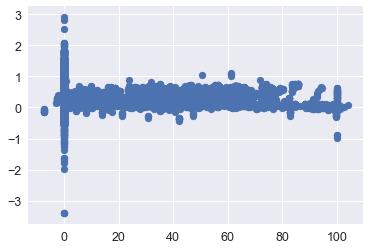

In [204]:
# sns.scatterplot(x='returns_2017',y='bonds_aaa',data=train)
plt.scatter(y='mean_annual_return_3y',x='bonds_aaa',data=train)

In [212]:
print(train['mean_annual_return_3y'].describe())
print('mean_annual', train['mean_annual_return_3y'].median(),'\n')

print(train['standard_deviation_3y'].describe())
print('standard deviation', train['standard_deviation_3y'].median(),'\n')

print(train['sharpe_ratio_3y'].describe())
print('Sharpe ratio',train['sharpe_ratio_3y'].median(),'\n')

# print(train['mean_annual_return_3y'].describe())
print(train['beta_3y'].describe())
print('Beta', train['beta_3y'].median(),'\n')

print(train['alpha_3y'].describe())
print('Alpha', train['alpha_3y'].median(),'\n')

print(train['treynor_ratio_3y'].describe())
print('Treynor ratio',train['treynor_ratio_3y'].median(),'\n')
# alpha_3y                          1726
# beta_3y                           1726
# mean_annual_return_3y             1726
# standard_deviation_3y             1726
# sharpe_ratio_3y                   1726
# treynor_ratio_3y   1726

# choose variable mean_annula_3y or standard_deviation_3y with mean/median imputation
# choose sharpe_ratio_3y with mena or median imputation



count    15928.000000
mean         0.463029
std          0.353618
min         -3.410000
25%          0.210000
50%          0.430000
75%          0.690000
max          2.920000
Name: mean_annual_return_3y, dtype: float64
mean_annual 0.43 

count    15928.000000
mean         8.784502
std          4.879875
min          0.170000
25%          4.440000
50%          9.530000
75%         11.830000
max         39.580000
Name: standard_deviation_3y, dtype: float64
standard deviation 9.53 

count    15928.000000
mean         0.536970
std          0.386749
min         -2.920000
25%          0.340000
50%          0.580000
75%          0.770000
max          3.320000
Name: sharpe_ratio_3y, dtype: float64
Sharpe ratio 0.58 

count    15928.000000
mean         0.881753
std          0.455500
min         -9.970000
25%          0.760000
50%          0.930000
75%          1.060000
max         23.790000
Name: beta_3y, dtype: float64
Beta 0.93 

count    15928.000000
mean        -0.367700
std          3.1945

count    9489.000000
mean       -1.302956
std         8.293562
min       -42.710000
25%        -5.320000
50%        -0.580000
75%         4.200000
max        55.810000
Name: returns_2011, dtype: float64 



C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


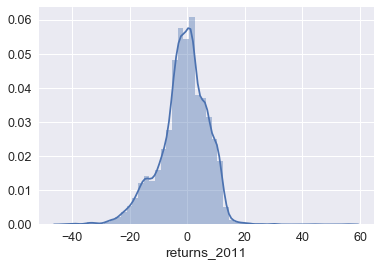

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


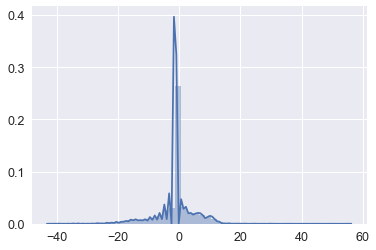

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


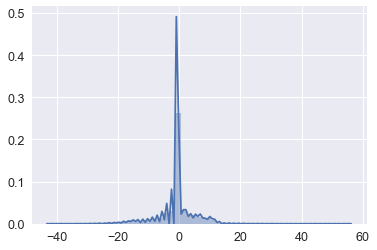

count    11406.000000
mean        16.653622
std         16.666759
min        -52.880000
25%          0.632500
50%         17.770000
75%         31.147500
max        116.380000
Name: returns_2013, dtype: float64 



C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


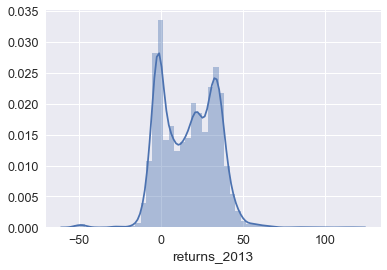

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


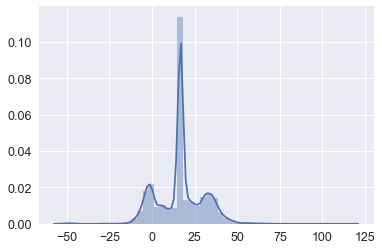

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


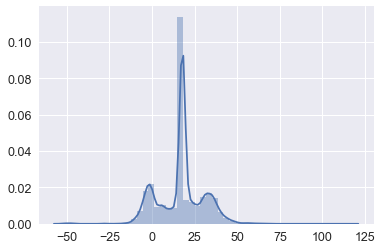

count    13659.000000
mean        -2.016711
std          6.286943
min        -56.950000
25%         -3.830000
50%         -1.240000
75%          1.060000
max         49.820000
Name: returns_2015, dtype: float64 



C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


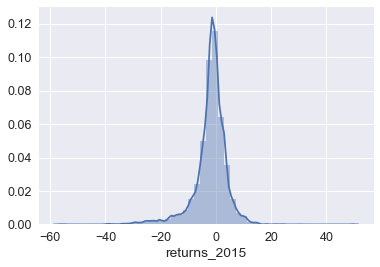

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


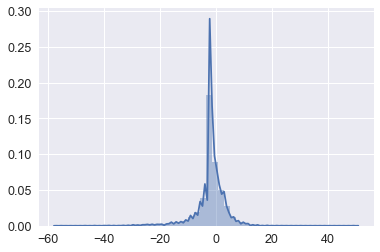

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


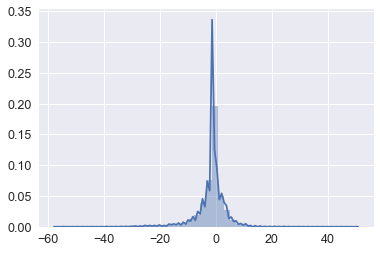

count    15876.000000
mean        14.984685
std         10.929005
min        -55.310000
25%          5.980000
50%         13.850000
75%         21.610000
max         80.880000
Name: returns_2017, dtype: float64 



C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


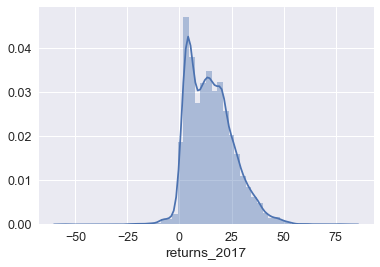

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


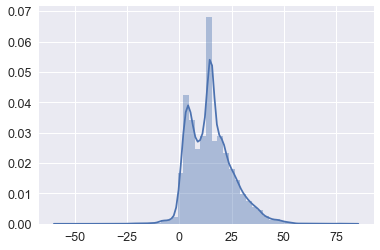

C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


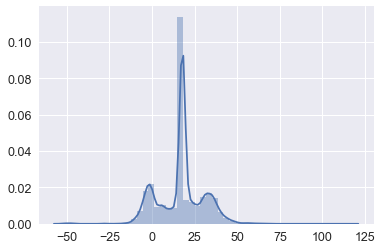

In [229]:
# 11, 13 15 17
# use 15 and 17 with mean imputations
imputer2 = Imputer(strategy='median')

print(train['returns_2011'].describe(),'\n')
# sns.distplot(train['returns_2011'].interpolate(method='ffill'))
sns.distplot(train['returns_2011'].dropna())
plt.show()
sns.distplot(imputer.fit_transform(train[['returns_2011']]).ravel())
# imputer.fit_transform(train[['returns_2011']]).ravel()
plt.show()
sns.distplot(imputer2.fit_transform(train[['returns_2011']]).ravel())
plt.show()

print(train['returns_2013'].describe(),'\n')
sns.distplot(train['returns_2013'].dropna())
plt.show()
# imputer = Imputer(strategy='median')
sns.distplot(imputer.fit_transform(train[['returns_2013']]).ravel())
plt.show()
sns.distplot(imputer2.fit_transform(train[['returns_2013']]).ravel())
plt.show()

print(train['returns_2015'].describe(),'\n')
sns.distplot(train['returns_2015'].dropna())
plt.show()
sns.distplot(imputer.fit_transform(train[['returns_2015']]).ravel())
plt.show()
sns.distplot(imputer2.fit_transform(train[['returns_2015']]).ravel())
plt.show()

print(train['returns_2017'].describe(),'\n')
sns.distplot(train['returns_2017'].dropna())
plt.show()
sns.distplot(imputer.fit_transform(train[['returns_2017']]).ravel())
plt.show()
sns.distplot(imputer2.fit_transform(train[['returns_2013']]).ravel())
plt.show()

#### 2.1 Handelling the categorical variables -- Sum and investment

In [16]:
investment_encod = pd.get_dummies(train['investment'])
train = train.join(investment_encod)
# print(train.describe())

In [28]:
investment_encod = pd.get_dummies(train['size'])
train = train.join(investment_encod)
# print(train.describe())

ValueError: columns overlap but no suffix specified: Index(['Large', 'Medium', 'Small'], dtype='object')

In [18]:
train.isnull().sum()

Serial Number                        0
fund_symbol                          0
fund_name                            0
category                             0
fund_family                          0
investment                         967
size                               967
total_net_assets                     0
currency                             0
net_annual_expenses_ratio           12
morningstar_rating                   0
inception_date                       0
portfolio_cash                       0
portfolio_stocks                     0
portfolio_bonds                      0
portfolio_others                     0
portfolio_preferred                  0
portfolio_convertable                0
sectors_basic_materials              0
sectors_consumer_cyclical            0
sectors_financial_services           0
sectors_real_estate                  0
sectors_consumer_defensive           0
sectors_healthcare                   0
sectors_utilities                    0
sectors_communication_ser

In [245]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder()
# encoder.fit_transform(train['investment'])

#### Performing Imputations - for selected features


In [21]:
# choose variable mean_annula_3y or standard_deviation_3y with mean/median imputation
# choose sharpe_ratio_3y with mena or median imputation

mean_imputer = Imputer()
median_imputer = Imputer(strategy='median')
train['standard_deviation_3y']  = median_imputer.fit_transform(train[['standard_deviation_3y']]).ravel()
train['sharpe_ratio_3y']  = median_imputer.fit_transform(train[['sharpe_ratio_3y']]).ravel()

# use returns_15 and returns_17 with mean imputations


train['returns_2015']  = mean_imputer.fit_transform(train[['returns_2015']]).ravel()
train['returns_2017']  = mean_imputer.fit_transform(train[['returns_2017']]).ravel()

#### Selecting the feature to build the model

In [248]:
train.columns

Index(['Serial Number', 'fund_symbol', 'fund_name', 'category', 'fund_family',
       'investment', 'size', 'total_net_assets', 'currency',
       'net_annual_expenses_ratio', 'morningstar_rating', 'inception_date',
       'portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning',
       'bonds_us_government', 'bonds_aaa', 'bonds_aa', 'bonds_a', 'bonds_bbb',
       'bonds_bb', 'bonds_b', 'bonds_below_b', 'bonds_others',
       'morningstar_return_rating', 'returns_ytd', 'returns_2017',
       'returns_2016', 'returns_2015', 'returns_2014', 'returns_2013',
       'returns_2012', 'returns_20

In [26]:
train_select = train[['total_net_assets','net_annual_expenses_ratio', 'morningstar_rating','portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
        'bonds_aaa',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning','returns_ytd', 'returns_2017',
       'returns_2015','morningstar_risk_rating',
        'standard_deviation_3y', 'sharpe_ratio_3y',
       'MISSING_size', 'Medium', 'Small']]
# 'Blend', 'Growth', 'MISSING', 'Value', 'Large',

KeyError: "['MISSING_size'] not in index"

In [300]:
len(train_select.columns)

31

In [277]:
train_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17654 entries, 0 to 17772
Data columns (total 31 columns):
total_net_assets                  17654 non-null int64
net_annual_expenses_ratio         17654 non-null float64
morningstar_rating                17654 non-null int64
portfolio_cash                    17654 non-null float64
portfolio_stocks                  17654 non-null float64
portfolio_bonds                   17654 non-null float64
portfolio_others                  17654 non-null float64
portfolio_preferred               17654 non-null float64
portfolio_convertable             17654 non-null float64
bonds_aaa                         17654 non-null float64
sectors_basic_materials           17654 non-null float64
sectors_consumer_cyclical         17654 non-null float64
sectors_financial_services        17654 non-null float64
sectors_real_estate               17654 non-null float64
sectors_consumer_defensive        17654 non-null float64
sectors_healthcare                17654 

In [100]:
import missingno as ms

#### Dummy test Without Imputations -  using Gradient Boost Algorithm

In [373]:
from sklearn.model_selection import train_test_split

target = train_select['bonds_aaa']
predictors = train_select.drop(['bonds_aaa'],axis=1)

In [374]:
predictors = median_imputer.fit_transform(predictors)

In [383]:
target = median_imputer.fit_transform(train[['bonds_aaa']]).ravel()

In [375]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [384]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, train_size=0.8,test_size=0.2, random_state=7)


In [377]:
X_train.shape

(14218, 30)

In [264]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
print(model.fit(X_train,Y_train))

pred = model.predict(X_test)

print(mean_absolute_error(Y_test, pred))

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)
7.656939900802773


In [266]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
print(model.fit(X_train,Y_train))

pred = model.predict(X_test)

print(mean_absolute_error(Y_test, pred))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
13.559559582408893


In [305]:
from sklearn import linear_model, svm, tree, ensemble

models = [
    linear_model.LinearRegression(),
    linear_model.Ridge(),
    linear_model.Lasso(),
    linear_model.ElasticNet(),
    linear_model.BayesianRidge(),
#     linear_model.RANSACRegressor(),
    svm.LinearSVR(),
    svm.SVR(),
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),
    ensemble.RandomForestRegressor(),
    ensemble.GradientBoostingRegressor()

]

In [392]:
for model in models:
    model.fit(predictors,target)
    print('-'*30)
    print(model.__class__.__name__)
    
    train_pred = model.predict(predictors)
    train_rmse = np.sqrt(mean_squared_error(target, train_pred))
    print("Root mean square error train {}".format(train_rmse))    

    pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(Y_test, pred))
    print("Root mean square error test {}".format(rmse))

------------------------------
LinearRegression
Root mean square error train 19.108223919674867
Root mean square error test 18.784027381213214
------------------------------
Ridge
Root mean square error train 19.108227242199625
Root mean square error test 18.783988410807552


C:\Users\amitkumar_kataria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.968465e-22
  overwrite_a=True).T


------------------------------
Lasso
Root mean square error train 20.42524111824721
Root mean square error test 20.012624307655805
------------------------------
ElasticNet
Root mean square error train 20.468822981516766
Root mean square error test 20.05273274469214
------------------------------
BayesianRidge
Root mean square error train 19.108447104839172
Root mean square error test 18.78389827248947
------------------------------
LinearSVR
Root mean square error train 30506.854280111096
Root mean square error test 30760.028953822963
------------------------------
SVR
Root mean square error train 23.952829277852917
Root mean square error test 23.28216992407457
------------------------------
DecisionTreeRegressor
Root mean square error train 0.02795478528030386
Root mean square error test 1.7756540275668457e-15
------------------------------
ExtraTreeRegressor
Root mean square error train 0.02795478528030386
Root mean square error test 1.440971050665441e-15
---------------------------

In [259]:
# X_train  = X_train.select_dtypes(exclude=['object'])

In [258]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

In [68]:
X_train.shape

(12357, 47)

In [76]:
# X_train = X_train.dropna()
# print(X_train.shape)
Y_train = Y_train[X_train.index]

In [61]:
# X_train  = X_train.drop(['currency'],axis=1)

In [85]:
# X_test = X_test.dropna()
Y_test = Y_test[X_test.index]

In [261]:
pred = model.predict(X_test)

In [263]:
mean_absolute_error(Y_test, pred)

7.656585166955795

In [80]:
# X_test  = X_test.select_dtypes(exclude=['object'])

In [92]:
pred = pd.Series(pred)

In [93]:
res = pd.concat([pred, Y_test], axis=1,names=['predicted','True'])

In [293]:
# res

### Getting the result for the test data set

In [336]:
test = pd.read_csv('./Data/Yes_Bank_Test_Data.csv')

In [346]:
test.isnull().sum()

total_net_assets                  0
net_annual_expenses_ratio         0
morningstar_rating                0
portfolio_cash                    3
portfolio_stocks                  3
portfolio_bonds                   0
portfolio_others                  3
portfolio_preferred               3
portfolio_convertable             3
sectors_basic_materials           3
sectors_consumer_cyclical         3
sectors_financial_services        3
sectors_real_estate               3
sectors_consumer_defensive        3
sectors_healthcare                3
sectors_utilities                 3
sectors_communication_services    3
sectors_energy                    3
sectors_industrials               3
sectors_technology                3
price_earning                     3
returns_ytd                       0
returns_2017                      0
returns_2015                      0
morningstar_risk_rating           0
standard_deviation_3y             0
sharpe_ratio_3y                   0
MISSING_size                

In [347]:
test = median_imputer.fit_transform(test)

In [338]:
# test = test[test['returns_ytd'].notnull()]

# test = test[test['portfolio_bonds'].notnull()]
# test = test[test['net_annual_expenses'].notnull()]

test['returns_ytd'] = median_imputer.fit_transform(test[['returns_ytd']]).ravel()

test['portfolio_bonds'] = median_imputer.fit_transform(test[['portfolio_bonds']]).ravel()
test['net_annual_expenses'] = median_imputer.fit_transform(test[['net_annual_expenses']]).ravel()

In [339]:
test['investment'] = test['investment'].replace(np.nan, 'MISSING')

In [340]:
test['size'] = test['size'].replace(np.nan, 'MISSING_size')

In [341]:
investment_encod = pd.get_dummies(test['investment'])
test = test.join(investment_encod)

size_encod = pd.get_dummies(test['size'])
test = test.join(size_encod)

In [342]:
# choose variable mean_annula_3y or standard_deviation_3y with mean/median imputation
# choose sharpe_ratio_3y with mena or median imputation

mean_imputer = Imputer()
median_imputer = Imputer(strategy='median')
test['standard_deviation_3y']  = median_imputer.fit_transform(test[['standard_deviation_3y']]).ravel()
test['sharpe_ratio_3y']  = median_imputer.fit_transform(test[['sharpe_ratio_3y']]).ravel()

# use returns_15 and returns_17 with mean imputations


test['returns_2015']  = mean_imputer.fit_transform(test[['returns_2015']]).ravel()
test['returns_2017']  = mean_imputer.fit_transform(test[['returns_2017']]).ravel()

In [343]:
test['net_annual_expenses_ratio'] = test['net_annual_expenses']

In [348]:
test = test[['total_net_assets','net_annual_expenses_ratio', 'morningstar_rating','portfolio_cash', 'portfolio_stocks', 'portfolio_bonds',
       'portfolio_others', 'portfolio_preferred', 'portfolio_convertable',
       'sectors_basic_materials', 'sectors_consumer_cyclical',
       'sectors_financial_services', 'sectors_real_estate',
       'sectors_consumer_defensive', 'sectors_healthcare', 'sectors_utilities',
       'sectors_communication_services', 'sectors_energy',
       'sectors_industrials', 'sectors_technology', 'price_earning','returns_ytd', 'returns_2017',
       'returns_2015','morningstar_risk_rating',
        'standard_deviation_3y', 'sharpe_ratio_3y',
       'MISSING_size', 'Medium', 'Small']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [402]:
test_pred = models[-1].predict(test)

In [403]:
test_sub = pd.read_csv('./Data/Yes_Bank_Test_Data.csv')

In [353]:
test_sub.shape

(7621, 48)

In [ ]:
pd.series?

In [404]:
result = pd.concat([test_sub['Serial Number'],pd.Series(test_pred)], axis =1,)


In [405]:
result['bonds_aaa'] = result[0]
result.drop([0],axis=1)

,Serial Number,bonds_aaa
0,1,1.619281
1,2,-1.194166
2,3,21.053068
3,4,60.884324
4,5,10.029861
5,6,-0.131068
6,7,55.793106
7,8,14.829320
8,9,21.173298
9,10,-1.029302


In [ ]:
pd.DataFrame.to_csv(result[['Serial Number','bonds_aaa']],path_or_buf='./output/results_yes_1_3.csv')

In [263]:
mean_absolute_error(Y_test, pred)

7.656585166955795